# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

# Load the Dataset

In [2]:
dataframe=pd.read_excel("Online retail.xlsx",sheet_name="Sheet1",header=None)
dataframe.columns=["Items"]

In [3]:
dataframe

,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [4]:
data_exp = dataframe["Items"].str.split(",",expand=True)
data_exp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


# Unique items in the Transactions

In [5]:
unique_items = pd.unique(data_exp.values.ravel())
print(unique_items)

['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
 'whole weat flour' 'yams' 'cottage cheese' 'energy drink' 'tomato juice'
 'low fat yogurt' 'green tea' 'honey' 'salad' 'mineral water' 'salmon'
 'antioxydant juice' 'frozen smoothie' 'spinach' 'olive oil' 'burgers'
 'meatballs' 'eggs' None 'chutney' 'turkey' 'milk' 'energy bar'
 'whole wheat rice' 'whole wheat pasta' 'french fries' 'soup'
 'light cream' 'shallot' 'frozen vegetables' 'spaghetti' 'pet food'
 'cookies' 'cooking oil' 'champagne' 'chocolate' 'chicken' 'oil'
 'fresh tuna' 'tomatoes' 'black tea' 'extra dark chocolate' 'protein bar'
 'red wine' 'pasta' 'pepper' 'shampoo' 'rice' 'sparkling water' 'ham'
 'body spray' 'pancakes' 'grated cheese' 'white wine' 'toothpaste'
 'parmesan cheese' 'fresh bread' 'ground beef' 'escalope' 'herb & pepper'
 'tomato sauce' 'magazines' 'strawberries' 'strong cheese' 'pickles'
 'cake' 'hot dogs' 'brownies' 'cereals' 'clothes accessories' 'bug spray'
 'muffins' 'light mayo' 'gums' 'sod

In [6]:
print(None in unique_items)

True


In [7]:
dataframe["Items"]=dataframe['Items'].str.split(',')
dataframe

,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."
...,...
7496,"[butter, light mayo, fresh bread]"
7497,"[burgers, frozen vegetables, eggs, french frie..."
7498,[chicken]
7499,"[escalope, green tea]"


# Converting into 0's and 1's
# if purchased--1
# if not purchased--0

In [8]:
from mlxtend.preprocessing import TransactionEncoder
encoder=TransactionEncoder()
data=encoder.fit_transform(dataframe.iloc[:,0])
print('Data type of encoded data is :',data.dtype)
data

Data type of encoded data is : bool


array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [9]:
encoder.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

# Total number of items

In [10]:
len(encoder.columns_)

120

In [11]:
Df = pd.DataFrame(data, dtype=int ,columns=encoder.columns_)
Df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apriori

In [13]:
frequent_itemsets_8=apriori(Df,min_support=0.8,use_colnames=True)
frequent_itemsets_8

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


In [14]:
frequent_itemsets_5= apriori(Df , min_support=0.5,use_colnames=True)
frequent_itemsets_5

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


In [15]:
frequent_itemsets_3= apriori(Df , min_support=0.3,use_colnames=True)
frequent_itemsets_3

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


In [16]:
frequent_itemsets_2= apriori(Df , min_support=0.2,use_colnames=True)
frequent_itemsets_2

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.238368,(mineral water)


In [17]:
frequent_itemsets_1=apriori(Df , min_support=0.1,use_colnames=True)
frequent_itemsets_1

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [18]:
frequent_itemsets_05=apriori(Df , min_support=0.05,use_colnames=True)
frequent_itemsets_05

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [20]:
frequent_itemsets_01= apriori(Df , min_support=0.01,use_colnames=True)
frequent_itemsets_01

C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, olive oil, mineral water)"


# Rules

In [21]:
rules_6=association_rules(frequent_itemsets_01,metric="confidence",min_threshold=0.6)
rules_6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [22]:
rules_5=association_rules(frequent_itemsets_01,metric="confidence",min_threshold=0.5)
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
1,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969


In [23]:
rules_4=association_rules(frequent_itemsets_01,metric="confidence",min_threshold=0.4)
rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
2,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045,0.423972
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
4,"(chocolate, eggs)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394,0.426498
5,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
6,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922
7,"(spaghetti, chocolate)",(mineral water),0.039195,0.238368,0.015865,0.404762,1.698053,0.006522,1.279541,0.427860
8,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
9,"(milk, eggs)",(mineral water),0.030796,0.238368,0.013065,0.424242,1.779778,0.005724,1.322834,0.452053


In [25]:
rules_3=association_rules(frequent_itemsets_01,metric="confidence",min_threshold=0.3)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921,0.322617
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198,0.413162
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502
...,...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597,0.492451
59,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452


# Total No of rules with confidence=0.3

In [26]:
len(rules_3)

63

# Sort The rules using the Lift ratio

In [27]:
rules_3.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
56,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,0.607262
51,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929,0.603138
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861,0.599484
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
...,...,...,...,...,...,...,...,...,...,...
10,(frozen smoothie),(mineral water),0.063325,0.238368,0.020264,0.320000,1.342461,0.005169,1.120047,0.272346
19,(honey),(mineral water),0.047460,0.238368,0.015065,0.317416,1.331619,0.003752,1.115806,0.261443
20,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585,0.259747
9,(fresh bread),(mineral water),0.043061,0.238368,0.013332,0.309598,1.298820,0.003067,1.103171,0.240424


# First 20 Rules

In [28]:
rules=rules_3.sort_values("lift",ascending=False)[:20]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
56,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,0.607262
51,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929,0.603138
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861,0.599484
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
45,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
54,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
34,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028
33,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

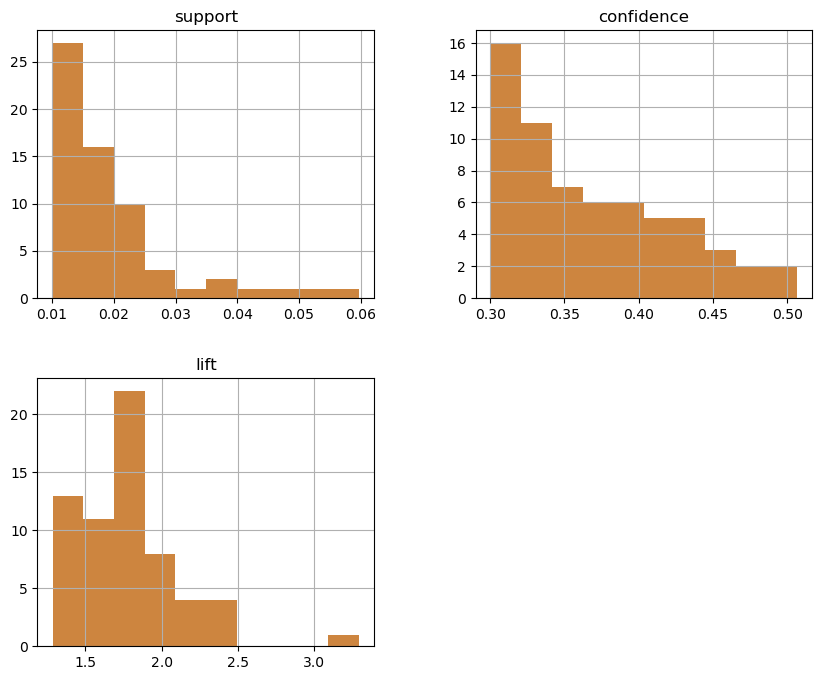

In [29]:
rules_3[["support","confidence","lift"]].hist(color="peru",figsize=(10,8))

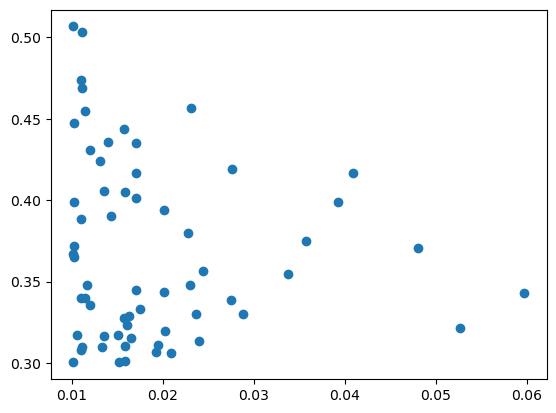

In [30]:
plt.scatter(rules_3["support"],rules_3["confidence"])

# Rules to csv File

In [31]:
rules.to_csv("rules.csv")

In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
56,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,0.607262
51,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929,0.603138
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861,0.599484
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
45,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
54,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
34,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028
33,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186


# Analysis and Interpretation

# Most of the Customers transactions having the mineral water and spaghetti.
# These two products are associated with many other products
# Most of the Consequents are spaghetti

# 50% of the people who are purchasing (ground beef,eggs) as antecedents are buying mineral water as consequents
# 50% of the people who are purchasing (ground beef,milk) as antecedents are buying mineral water as consequents
# IF (herb & pepper) THEN (ground beef) has the Highest lift ratio